## Pratical 5 - Desutsch Algorithm

In [1]:
!pip3 install qiskit
!pip3 install qiskit_aer
!pip3 install qiskit[visualization]

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [3]:
def constant_oracle_0():
    """Oracle for f(x) = 0 (constant) - identity"""
    oracle = QuantumCircuit(2)
    return oracle

In [4]:
def constant_oracle_1():
    """Oracle for f(x) = 1 (constant) - flips the output qubit"""
    oracle = QuantumCircuit(2)
    oracle.x(1)
    return oracle

In [5]:
def balanced_oracle_x():
    """Oracle for f(x) = x (balanced) - CNOT gate"""
    oracle = QuantumCircuit(2)
    oracle.cx(0, 1)
    return oracle

In [6]:
def deutsch_algorithm(oracle):
    # Create a 2-qubit, 1-classical-bit circuit
    qc = QuantumCircuit(2, 1)
    # Initialize second qubit to |1>
    qc.x(1)
    # Apply Hadamard on both qubits
    qc.h([0, 1])
    qc.barrier() # add a barrier for readability
    # Apply the oracle
    qc.compose(oracle, inplace=True) # append the oracle circuit to qc
    qc.barrier()
    # Apply Hadamard on the first qubit
    qc.h(0)
    # Measure the first qubit
    qc.measure(0, 0)
    return qc

In [7]:
# Select oracle to test; change to test different oracles
oracle = balanced_oracle_x()

In [8]:
# Create the Deutsch algorithm circuit with the chosen oracle
circuit = deutsch_algorithm(oracle)
print(circuit.draw())

     ┌───┐      ░       ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───■───░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘ ░       ║ 
c: 1/═══════════════════════════╩═
                                0 


In [9]:
# Use Qiskit Aer simulator
simulator = AerSimulator()

In [10]:
# Execute the circuit on the simulator with 100 shots
result = simulator.run(circuit, shots=100).result()
counts = result.get_counts()

print("Measurement results:", counts)

Measurement results: {'1': 100}


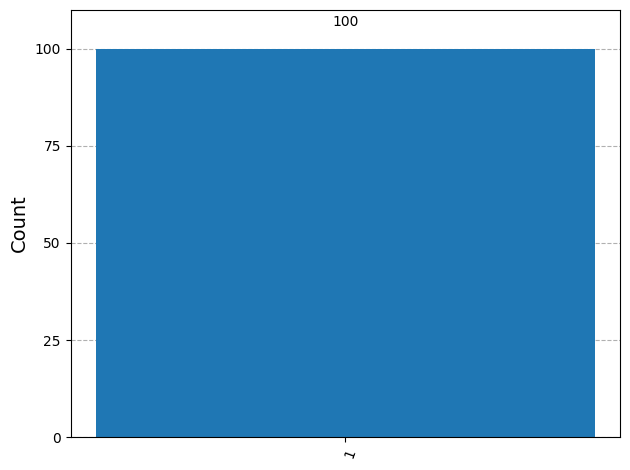

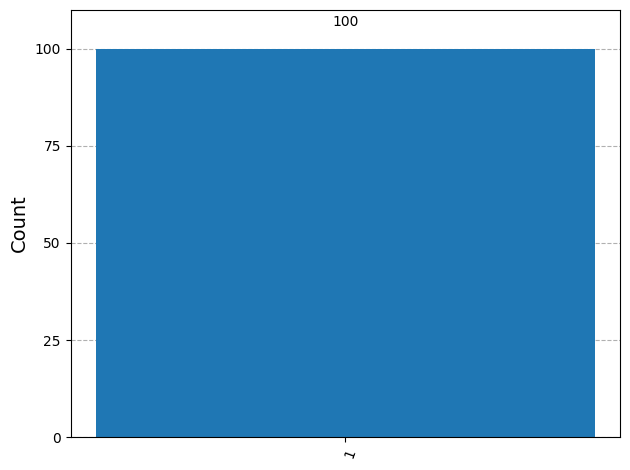

In [11]:
# Plot the results
hist_fig = plot_histogram(counts)
hist_fig